### Importing all the required libraries and dataset 

In [12]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Setting random seed for tf and numpy
tf.random.set_seed(10)
np.random.seed(10)

### Dataset 

In [2]:
#Load the data and split it into train and test 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


### Exploring Dataset

In [3]:
#Get the image shape
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


> we have 60000 and 10000, 28x28 images in our training and test dataset respectively.  

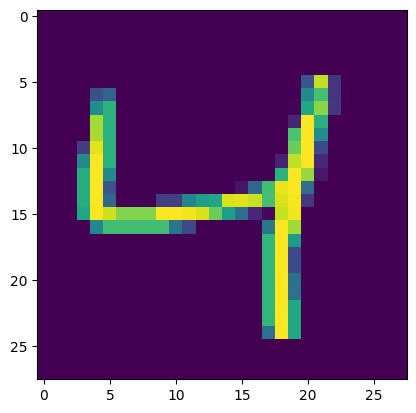

In [14]:
# Showing some images
plt.imshow(X_train[2])
plt.show()

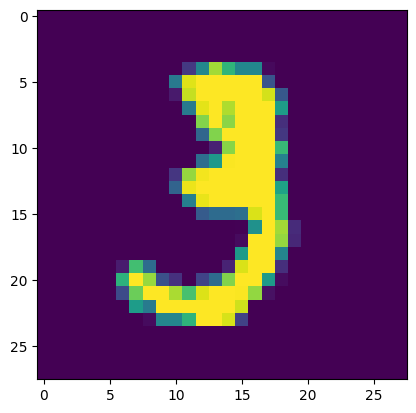

In [15]:
# Showing some images
plt.imshow(X_train[10])
plt.show()

### Tranformations
Converting data into the format which is required to train the model

In [16]:
# Reshaping the data to fit the model
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [20]:
# One-Hot Encoding: to convert labels into one hot encoded vector
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Model
model open sourced from "https://github.com/chandan450/MNIST-Handwritten-Digit-Classification"

In [21]:
# Build the CNN model
model = Sequential()
# Add model layers
model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
#Train the model
hist = model.fit(X_train,y_train_one_hot, validation_data=(X_test,y_test_one_hot), epochs=16)
 

Epoch 1/16
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2265 - accuracy: 0.9516 - val_loss: 0.0684 - val_accuracy: 0.9785
Epoch 2/16
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0678 - accuracy: 0.9796 - val_loss: 0.0643 - val_accuracy: 0.9819
Epoch 3/16
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0536 - accuracy: 0.9832 - val_loss: 0.0598 - val_accuracy: 0.9828
Epoch 4/16
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0456 - accuracy: 0.9861 - val_loss: 0.0727 - val_accuracy: 0.9810
Epoch 5/16
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0357 - accuracy: 0.9887 - val_loss: 0.0732 - val_accuracy: 0.9809
Epoch 6/16
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0320 - accuracy: 0.9906 - val_loss: 0.0887 - val_accuracy: 0.9799
Epoch 7/16
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0274 - accuracy: 0.9918 - val_loss: 0.0922 -

In [89]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                46090     
                                                                 
Total params: 65194 (254.66 KB)
Trainable params: 65194 (254.66 KB)
Non-trainable params: 0 (0.00 Byte)
________________

> The model's validation `accuracy` and `loss` are 0.9854 and 0.01561 respectively, which is quite good!

In [25]:
# Saving the model for later use
model.save("trained_model_v1")

INFO:tensorflow:Assets written to: trained_model_v1/assets


INFO:tensorflow:Assets written to: trained_model_v1/assets


In [26]:
# loading the model
# loaded_model = tf.keras.models.load_model("trained_model_v1")

I have saved the original model but for the time being, I am still gonna use the model that I have trained during this notebook.

### Custom Images
These images are handwritten by me.

In [ ]:
# from IPython.display import Image, display
# display(Image(filename="3.jpeg",width=128,height=128))

In [ ]:
# display(Image(filename="7.jpeg",width=128,height=128))

Lets set the image resolution to 28*28, which is what our model was trained on.

In [ ]:
# from PIL import Image
# image_3 = Image.open("3.jpeg")
# image_3 = image_3.resize((28,28))
# image_3.show()

In [ ]:
# image_7 = Image.open("7.jpeg")
# image_7 = image_7.resize((28,28))
# image_7.show()

In [ ]:
# # Converting image to numpy array 
# converted_3 = np.array(image_3.convert("L"))
# # converted_3 = converted_3/255.0
# converted_3 = converted_3.reshape((1,28,28,1))

In [ ]:
# # Converting image to numpy array 
# converted_7 = np.array(image_7.convert("L"))
# # converted_7 = converted_7/255.0
# converted_7 = converted_7.reshape((1,28,28,1))

Now that the images have been converted into the format which is required by our model, we can make predictions.

In [ ]:
# prediction_3 = model.predict(converted_3)
# prediction_7 = model.predict(converted_7)

In [ ]:
# prediction_3

In [ ]:
# prediction_7

In [ ]:
# predicted_class_3 = prediction_3.argmax()
# predicted_class_7 = prediction_7.argmax()

In [ ]:
# predicted_class_3

In [ ]:
# predicted_class_7

### Taking an image and showing its prediction probability 

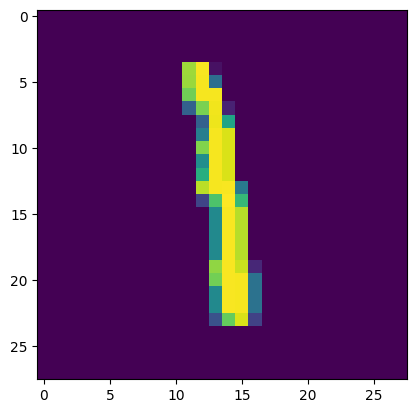

In [183]:
plt.imshow(X_test[29])
plt.show()

In [184]:
prob = model.predict(X_test[29].reshape((1,28,28,1)))

1/1 [==============================] - 0s 15ms/step


In [185]:
# Showing all the probabilities
prob

array([[2.9859021e-27, 1.0000000e+00, 1.2650618e-18, 3.6064206e-14,
        1.2409839e-17, 1.2697803e-18, 1.1538115e-28, 1.1279280e-21,
        3.6590100e-16, 4.0604185e-17]], dtype=float32)

In [186]:
# Prediction
prob.argmax()

1

In [187]:
# probability of 1 is:
print(f"Probability of 1 is: {prob[0,1]}")

Probability of 1 is: 1.0


### Optimization based testing

In [188]:
# Taking the above image as its prediction was correct
test_image = X_test[29]
# Changing the shape such that it is in the same format as required by our model
test_image = test_image.reshape((1,28,28,1))

In [189]:
# The original prediction made on our test image
original_prediction = prob

In [190]:
import random
from PIL import Image

# Parameters for noise generation
num_images = 100
max_pixel_difference = 3

# Create a list to store the prediction probability drops and noisy_image arrays
probability_drops = []
noisy_images = []
noisy_predictions = []

# Generate 100 noisy images
for _ in range(num_images):
    
    # Generate random noise with values between -3 and 3 
    noise = np.random.randint(-max_pixel_difference, max_pixel_difference + 1, size=test_image.shape)
    
    # Add noise to the test image array
    noisy_image_array = np.clip(test_image + noise, 0, 255).astype(np.uint8)
    
    # Make prediction and add it to noisy_prediction list
    noisy_prediction = model.predict(noisy_image_array)
    noisy_predictions.append(noisy_prediction)
    
    # Calculate the probability drop
    probability_drop = np.max(original_prediction) - np.max(noisy_prediction)
    probability_drops.append(probability_drop)
    noisy_images.append(noisy_image_array)


1/1 [==============================] - 0s 11ms/step


### Performing step 3, 4 and 5

In [191]:
# Top 10 images where the drop was max
top_10_indices = np.argsort(probability_drops)[-10:][::-1]

In [192]:
top_10_indices

array([99, 36, 26, 27, 28, 29, 30, 31, 32, 33])

In [193]:
# Ensuring that 100 noisy images were generated
len(noisy_images)

100

In [194]:
# Retrieve the top 10 noisy images and their probabilities using the indices
top_10_noisy_images = [noisy_images[idx] for idx in top_10_indices]
top_10_noisy_predictions = [noisy_predictions[idx] for idx in top_10_indices]

In [195]:
top_10_noisy_predictions[0]

array([[3.6320029e-28, 1.0000000e+00, 2.1271500e-18, 6.5764501e-16,
        5.8496969e-17, 1.6654341e-18, 2.2463599e-28, 7.6666496e-22,
        2.8016406e-16, 1.0023819e-17]], dtype=float32)

In [196]:
# Parameters for noise generation
num_images = 10
max_pixel_difference = 1

# Create a list to store the prediction probability drops, noisy_image arrays and noisy predictions
probability_drops = []
noisy_images = []
noisy_predictions = []

# Generate 100 noisier images
for i in range(num_images):
    for _ in range(num_images):
        
    # Generate random noise with values between -1 and 1 
        noise = np.random.randint(-max_pixel_difference, max_pixel_difference + 1, size=test_image.shape)
    
    # Add noise to the noisy image array
        noisy_image_array = np.clip(top_10_noisy_images[i] + noise, 0, 255).astype(np.uint8)
    
    # Make prediction 
        noisy_prediction = model.predict(noisy_image_array)
        noisy_predictions.append(noisy_prediction)
    
    # Calculate the probability drop
        probability_drop = np.max(top_10_noisy_predictions[i]) - np.max(noisy_prediction)
        probability_drops.append(probability_drop)
        
        noisy_images.append(noisy_image_array)

1/1 [==============================] - 0s 10ms/step


In [197]:
# Top 10 images where the drop was max
top_10_indices = np.argsort(probability_drops)[-10:][::-1]

### Step 6: Displaying the 10 candidates and their predictions

In [198]:
# Candidates
top_10_indices

array([99, 36, 26, 27, 28, 29, 30, 31, 32, 33])

In [200]:
# Retrieve the top 10 noisy images and their probabilities using the indices
top_10_noisy_images = [noisy_images[idx] for idx in top_10_indices]
top_10_noisy_predictions = [noisy_predictions[idx] for idx in top_10_indices]

In [201]:
# Candidate's Predictions
top_10_noisy_predictions

[array([[1.2136577e-27, 1.0000000e+00, 3.2608047e-18, 1.4600556e-15,
         2.4460826e-17, 1.5912910e-18, 8.2967786e-29, 3.4874193e-22,
         2.6535816e-16, 1.2562899e-17]], dtype=float32),
 array([[1.4096029e-27, 1.0000000e+00, 3.5941887e-18, 4.3237604e-16,
         2.1525628e-17, 5.9271880e-19, 1.0065537e-28, 3.2213841e-22,
         1.9300319e-16, 5.6017709e-18]], dtype=float32),
 array([[4.9911100e-28, 1.0000000e+00, 3.8278747e-18, 4.6867789e-16,
         1.1409671e-17, 1.8779043e-18, 8.2914275e-29, 5.0808622e-23,
         1.3126409e-16, 3.9244476e-18]], dtype=float32),
 array([[4.0310511e-28, 1.0000000e+00, 4.0661399e-18, 3.2767856e-16,
         8.6910982e-18, 1.7888877e-18, 6.7189587e-29, 1.4060754e-22,
         1.3546147e-16, 4.2507240e-18]], dtype=float32),
 array([[2.9249312e-28, 1.0000000e+00, 2.4689784e-18, 3.5274449e-16,
         7.6632030e-18, 2.0623780e-18, 3.8298459e-29, 6.8271784e-23,
         7.8706851e-17, 4.0609291e-18]], dtype=float32),
 array([[7.6981887e-29, 1